# Understanding Griffith theory of fracture through the example of the DCB peeling test

Author: Johann Rannou, https://github.com/JohannRannou

The latest version of this Jupyter notebook lecture is available at  https://github.com/JohannRannou/DCB

Griffith theory is the basement of linear elastic fracture theory. It is based on a simple thermodynamics balance analysis that can be difficult for the newbie to understand. The main thing to understand is that it is a one parameter analysis, this parameter is the crack area.

This tutorial uses the exemple of the Double Cantilever Beam (DCB) peeling test to illustrate the Griffith theory step by step. The DCB is a nice example since everything can be derived from the beam theory.

<img src="img/schema_DCB.jpg" alt="Drawing" style="width: 300px;"/>


In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from ipywidgets import widgets, FloatSlider


## Basis of the Griffith theory

## Beam theory applied to DCB

Problem parameters

In [2]:
E = 130e9
h = 2.e-3
b = 20.e-3
I = (b*h**3)/12.
Gc = 100.


Beam stiffness : 
$$k=\frac{F}{\delta/2}$$

In [3]:
def k(a):
    return 3/2*E*I/a**3

Deflection 

In [4]:
def deflection(x,delta,a):
    """
    a is the crack length (the beam length)
    x is the abscissa (along beam length)
    """
    P = k(a)*delta
    a = x[-1]
    y = P/(E*I)*(x**3/6-a**2/2*x+1/3*a**3)
    return y

Potential énergie

In [5]:
def Welast(a, delta):
    """Elastic energy
    """
    return 3/4*E*I/a**3*delta**2

Energy release rate in the case of displacement driven test

In [6]:
def G(a, delta):
    """Energy release rate
    """
    return 9/4*E*I/b/a**4*delta**2

get $a$ from $G_c$ and the load $\delta$

In [7]:
def a_from_G(G, delta):
    """Inverse relation that gives a in from a given G and a given delta"""
    return ((9/4*E*I/b*delta**2)/G)**(1/4)

In [8]:
def P(delta):
    """Force vs delta function"""
    P = (3/2)**(-1/2)*b**(3/4)*(E*I)**(1/4)*Gc**(3/4)*delta**(-1/2)
    return P

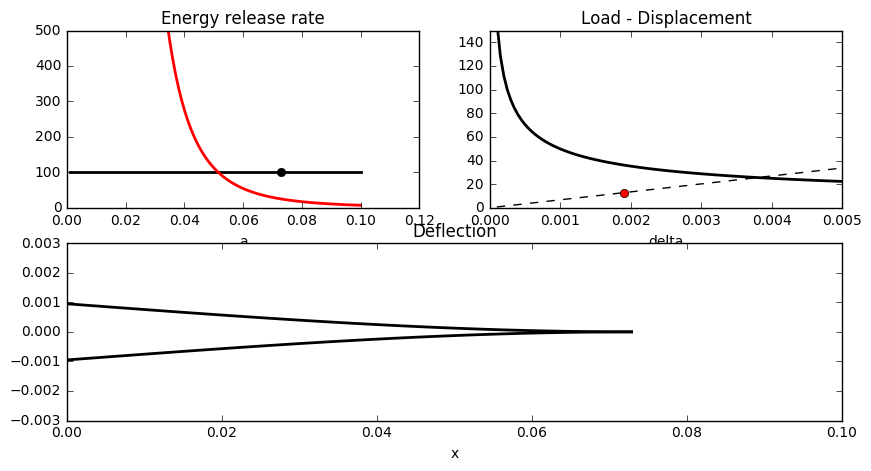

In [9]:
class DCB:
    """The plotting stuff
    """
    def __init__(self, a0, L):
        self.a_max = a0
        self.L = L
        
    def do_propagate(self, delta):
        if G(self.a_max, delta) > Gc:
            return True
        else:
            return False
        
    def plot(self, delta_mm):
        delta = delta_mm*1e-3
        gs = gridspec.GridSpec(2, 2)

        self.f = plt.figure()
        plt.subplots_adjust(bottom=0.25)
        self.a1 = plt.subplot(gs[0, 0]) # row 0, col 0
        self.a2 = plt.subplot(gs[0, 1]) # row 0, col 1
        self.a3 = plt.subplot(gs[1, :]) # row 1, span all columns
    
        a = a_from_G(Gc, delta)
        if a > self.a_max:
            self.a_max = a
       
        x = np.linspace(0, self.a_max, 50)        
        y = deflection(x, delta, self.a_max)

        a_range = np.linspace(0.001, self.L, 100)
        self.a1.set_title('Energy release rate')
        self.a1.plot(a_range, Gc*np.ones(a_range.shape), color='k')
        self.a1.plot(a_range, G(a_range,delta))
        self.a1.set_ylim(0, 500)
        self.a1.plot(self.a_max, Gc, 'o', color='k')
        self.a1.set_xlabel('a')
        
        delta_range = np.linspace(0.1e-3, 5e-3, 100)
        self.a2.set_title('Load - Displacement')
        self.a2.plot(delta_range, P(delta_range) , color='k')
        self.a2.plot(delta, min(k(self.a_max)*delta,P(delta)), 'o', color='r')
        self.a2.plot(delta_range, k(self.a_max)*delta_range, '--', color='k', lw=1)
        self.a2.set_xlabel('delta')
        self.a2.set_ylim(0., 150.)

            
        self.a3.set_title('Deflection')
        self.a3.plot(x,y,color='k')
        self.a3.plot(x,-y,color='k')
        self.a3.set_ylim(-3e-3, 3e-3)
        self.a3.set_xlim(0,self.L)
        self.a3.set_xlabel('x')



        
        plt.show()
        
plt.rcParams['figure.figsize'] = (10, 6)
DCB1 = DCB(a0=10.e-3, L=100.e-3)
widgets.interact(DCB1.plot, delta_mm=FloatSlider(min=0.1, max=5., step=0.1, value=0.1, description='Loading (mm)'))

